In [1]:
import numpyro

numpyro.enable_x64()
numpyro.set_host_device_count(4)
numpyro.set_platform('gpu') # set it to cpu and increase the number of devices if required

In [2]:
import jax.numpy as jnp 
from jax.tree_util import tree_flatten, tree_map, tree_reduce
from leaguedata.data import get_history_dict, get_tier_sorted, get_tier_batch

history = get_history_dict()
min_length = tree_reduce(min, tree_map(lambda x: len(x), history))

['IRON_IV', 'IRON_III', 'IRON_II', 'IRON_I']


sample: 100%|██████████| 2000/2000 [00:13<00:00, 150.62it/s]


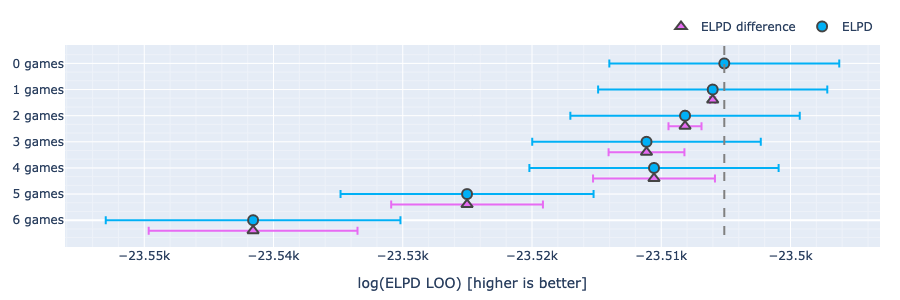

['BRONZE_IV', 'BRONZE_III', 'BRONZE_II', 'BRONZE_I']


sample: 100%|██████████| 2000/2000 [00:14<00:00, 135.88it/s]


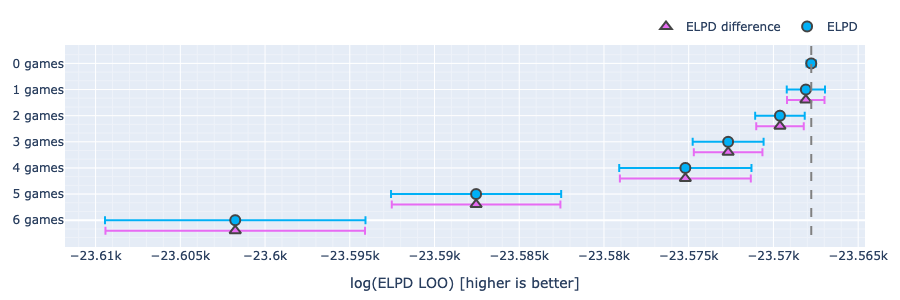

['SILVER_IV', 'SILVER_III', 'SILVER_II', 'SILVER_I']


sample: 100%|██████████| 2000/2000 [00:15<00:00, 125.63it/s]


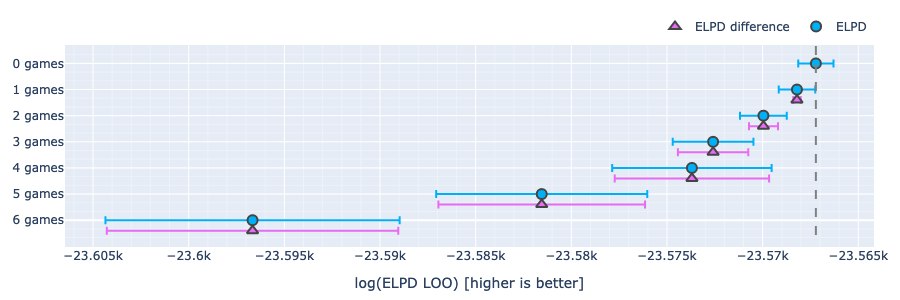

['GOLD_IV', 'GOLD_III', 'GOLD_II', 'GOLD_I']


sample: 100%|██████████| 2000/2000 [00:14<00:00, 134.76it/s]


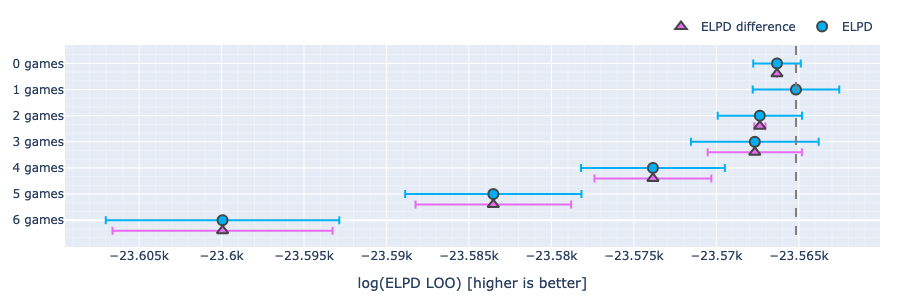

['PLATINUM_IV', 'PLATINUM_III', 'PLATINUM_II', 'PLATINUM_I']


sample: 100%|██████████| 2000/2000 [00:13<00:00, 143.74it/s]


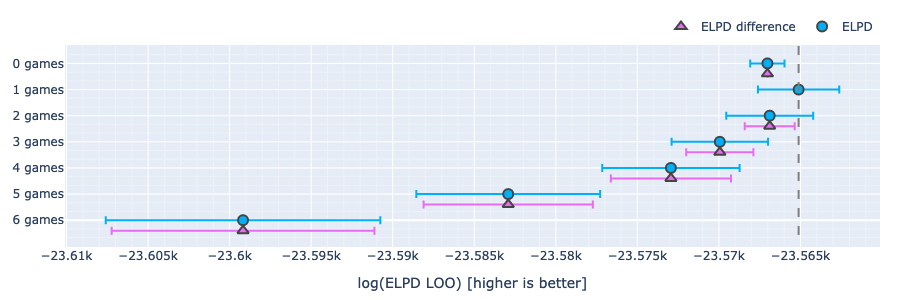

['EMERALD_IV', 'EMERALD_III', 'EMERALD_II', 'EMERALD_I']


sample: 100%|██████████| 2000/2000 [00:13<00:00, 143.70it/s]


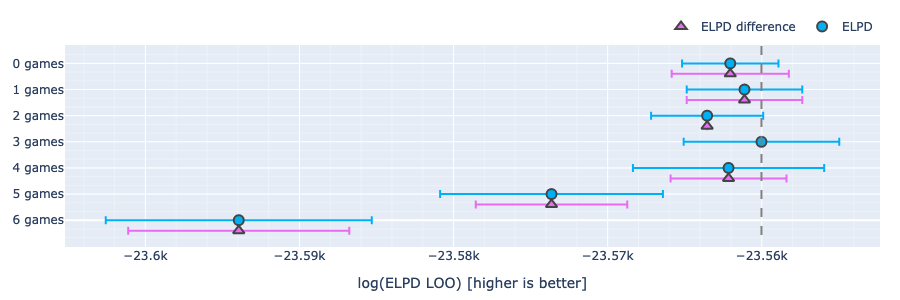

['DIAMOND_IV', 'DIAMOND_III', 'DIAMOND_II', 'DIAMOND_I']


sample: 100%|██████████| 2000/2000 [00:14<00:00, 139.81it/s]


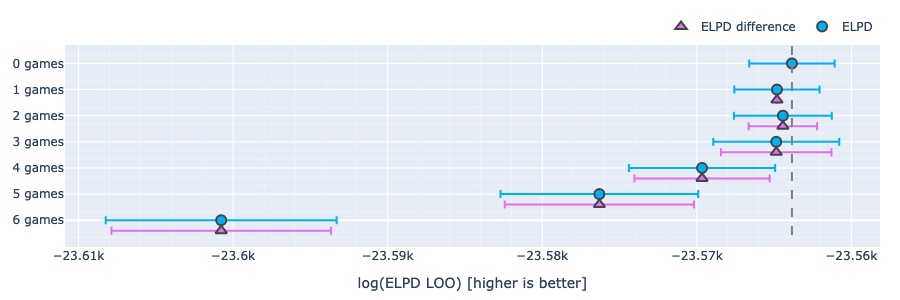

['MASTER']


sample: 100%|██████████| 2000/2000 [00:09<00:00, 200.54it/s]


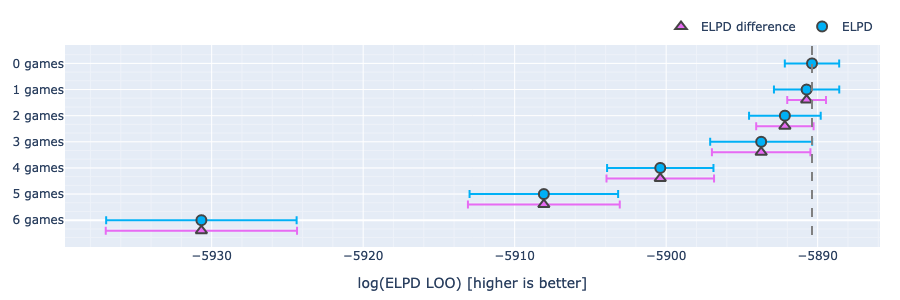

['GRANDMASTER']


sample: 100%|██████████| 2000/2000 [00:09<00:00, 200.60it/s]


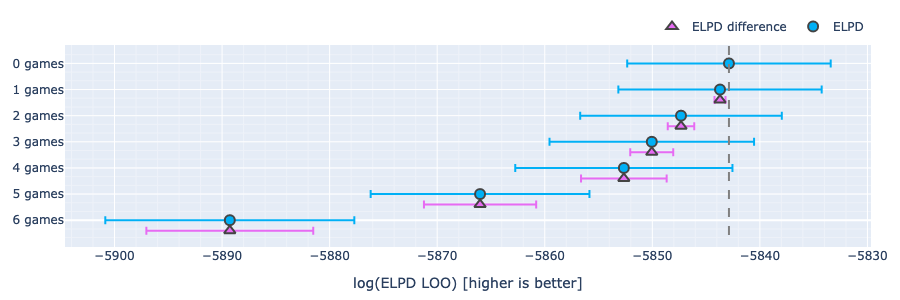

['CHALLENGER']


sample: 100%|██████████| 2000/2000 [00:10<00:00, 193.66it/s]


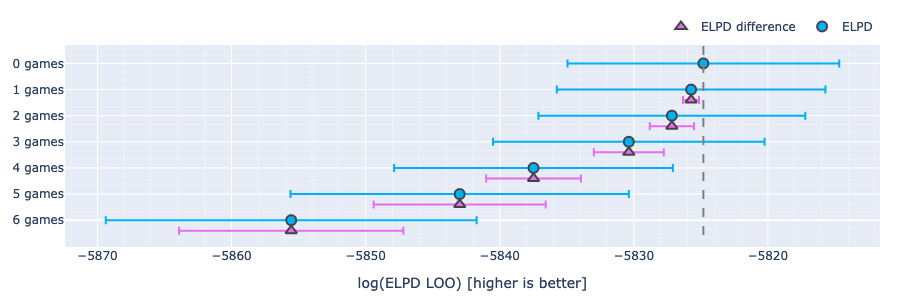

In [9]:
import pickle
import arviz as az
from leaguedata.data import get_tier_sorted
from leaguedata.inference import fit_history_with_dmc
from leaguedata.plot import plot_compare_plotly

for tier_list in get_tier_batch():
    print(tier_list)
    local_history = []
    for tier in tier_list:
        local_history.append(history[tier])
    
    history_array, _ = tree_flatten(tree_map(lambda x: x[-min_length:], local_history))
    history_array = jnp.asarray(history_array)
    dict_of_id = fit_history_with_dmc(history_array, num_chains=4)
    compare_dataframe = az.compare(dict_of_id)
    
    plot_compare_plotly(compare_dataframe, save_to=None);